## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from wordcloud import WordCloud

## Disable Warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

## Load the dataset

In [3]:
df = pd.read_csv("pincode.csv")

In [4]:
df

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Peddakotla B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5689,77.85624
1,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Pinnadhari B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5281,77.857014
2,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Yerraguntapalle B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.561111,77.85715
3,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Obulareddipalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.2488,78.2588
4,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Odulapalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.24555,78.2477
...,...,...,...,...,...,...,...,...,...,...,...
157121,Uttar Pradesh Circle,Bareilly Region,Meerut Division,Rly Road Meerut SO,250002,PO,Non Delivery,MEERUT,UTTAR PRADESH,28.98,77.6800000
157122,Uttar Pradesh Circle,Bareilly Region,Meerut Division,SGMandi SO,250002,PO,Non Delivery,MEERUT,UTTAR PRADESH,28.9724,77.6753600
157123,Uttar Pradesh Circle,Bareilly Region,Meerut Division,W K Road SO,250001,PO,Non Delivery,MEERUT,UTTAR PRADESH,28.99,77.7100000
157124,Kerala Circle,Calicut Region,Calicut Division,Kakkoti SO,673611,PO,Delivery,KOZHIKODE,KERALA,11.24529,75.7784550


## Data Statistics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157126 entries, 0 to 157125
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CircleName    157126 non-null  object
 1   RegionName    157073 non-null  object
 2   DivisionName  157124 non-null  object
 3   OfficeName    157126 non-null  object
 4   Pincode       157126 non-null  int64 
 5   OfficeType    157126 non-null  object
 6   Delivery      157126 non-null  object
 7   District      157126 non-null  object
 8   StateName     157126 non-null  object
 9   Latitude      148288 non-null  object
 10  Longitude     148283 non-null  object
dtypes: int64(1), object(10)
memory usage: 13.2+ MB


In [6]:
df.describe()

,Pincode
count,157126.000000
mean,503210.912338
std,207601.451534
min,110001.000000
25%,332602.000000
50%,504251.000000
75%,685609.000000
max,999999.000000


## EDA

### State-wise Distribution of Pincodes

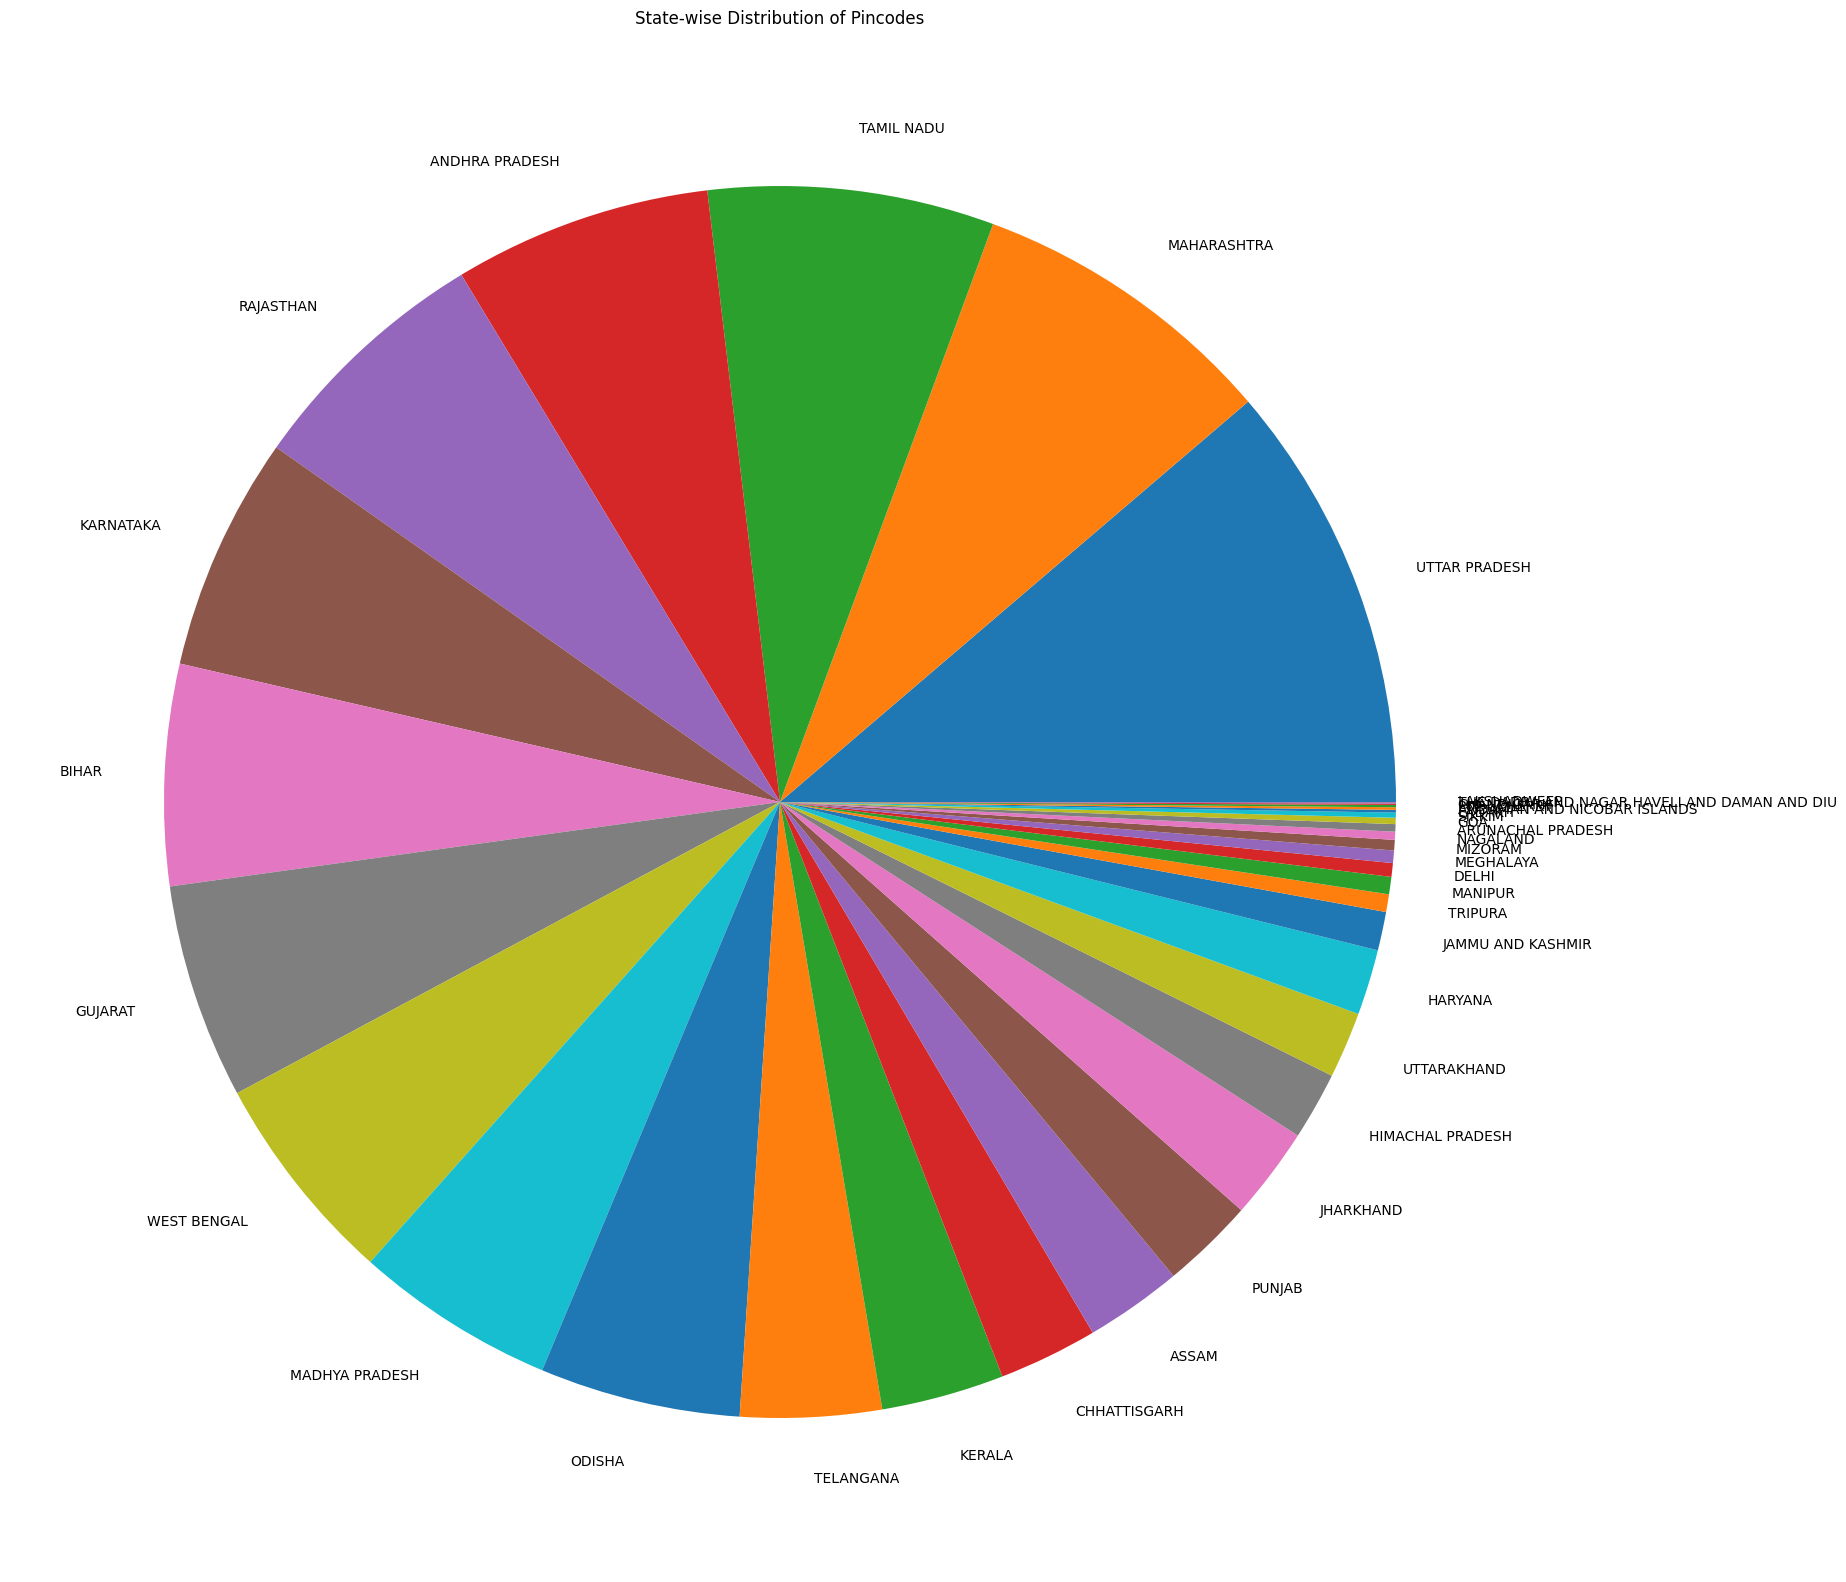

In [7]:
df['StateName'].value_counts().plot(kind='pie', figsize=(20,20))
plt.title('State-wise Distribution of Pincodes')
plt.ylabel('')
plt.show()

### Boxplot of Pincodes

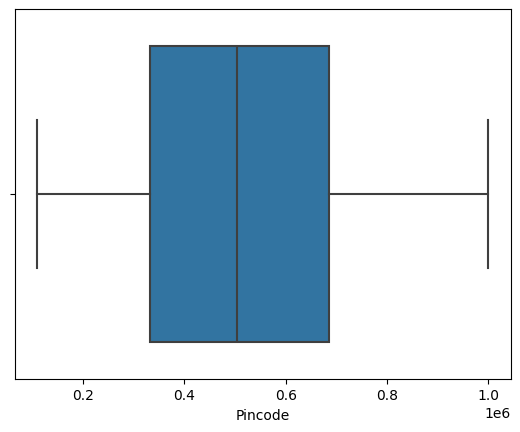

In [8]:
df['Pincode'] = pd.to_numeric(df['Pincode'], errors='coerce')
sns.boxplot(x=df['Pincode'])
plt.show()

### Heatmap of Pincodes per State and District

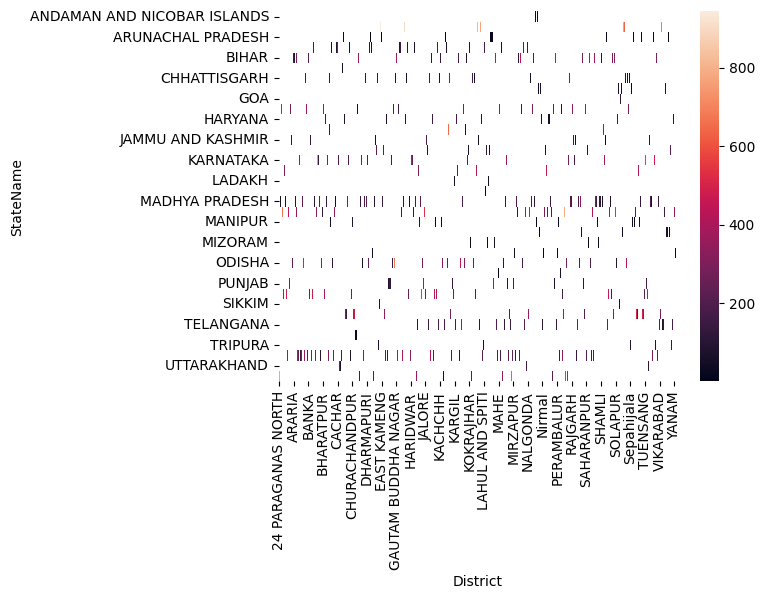

In [9]:
# Create a pivot table
pivot_table = df.pivot_table(index='StateName', columns='District', values='Pincode', aggfunc='count')
sns.heatmap(pivot_table)
plt.show()

### Word Cloud of Districts

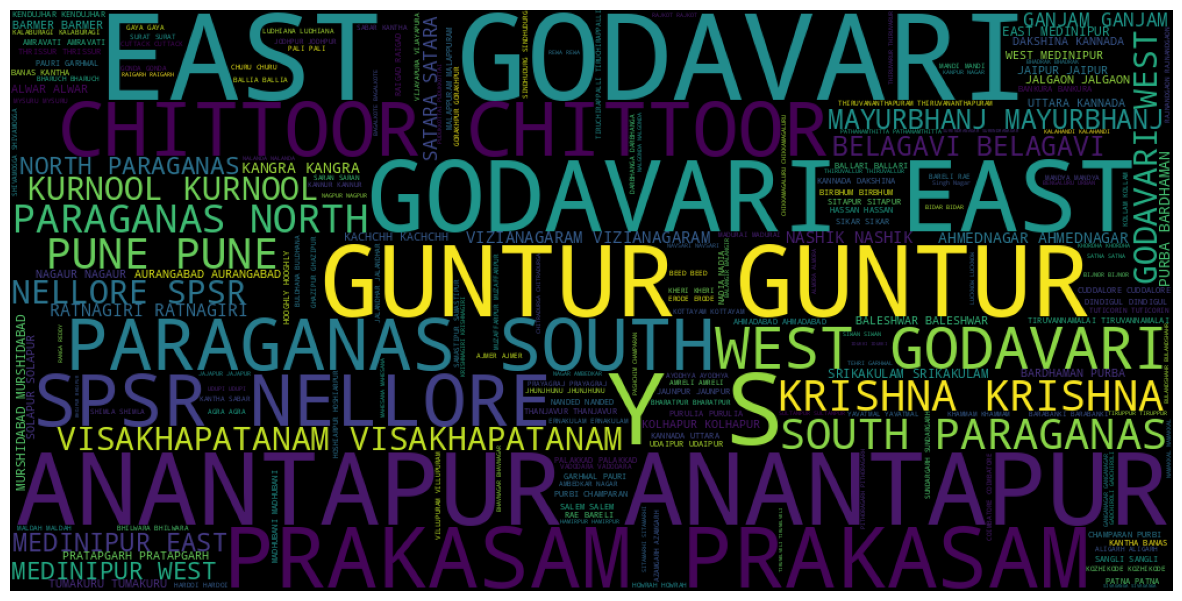

In [10]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(df['District']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Scatter Plot of Pincodes vs Districts

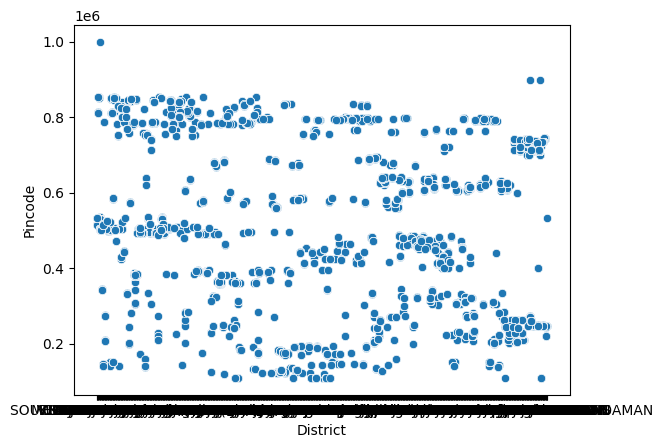

In [11]:
# Assuming there's a numeric value associated with each district
sns.scatterplot(x='District', y='Pincode', data=df)
plt.show()

### Pie Chart of Pincodes per State

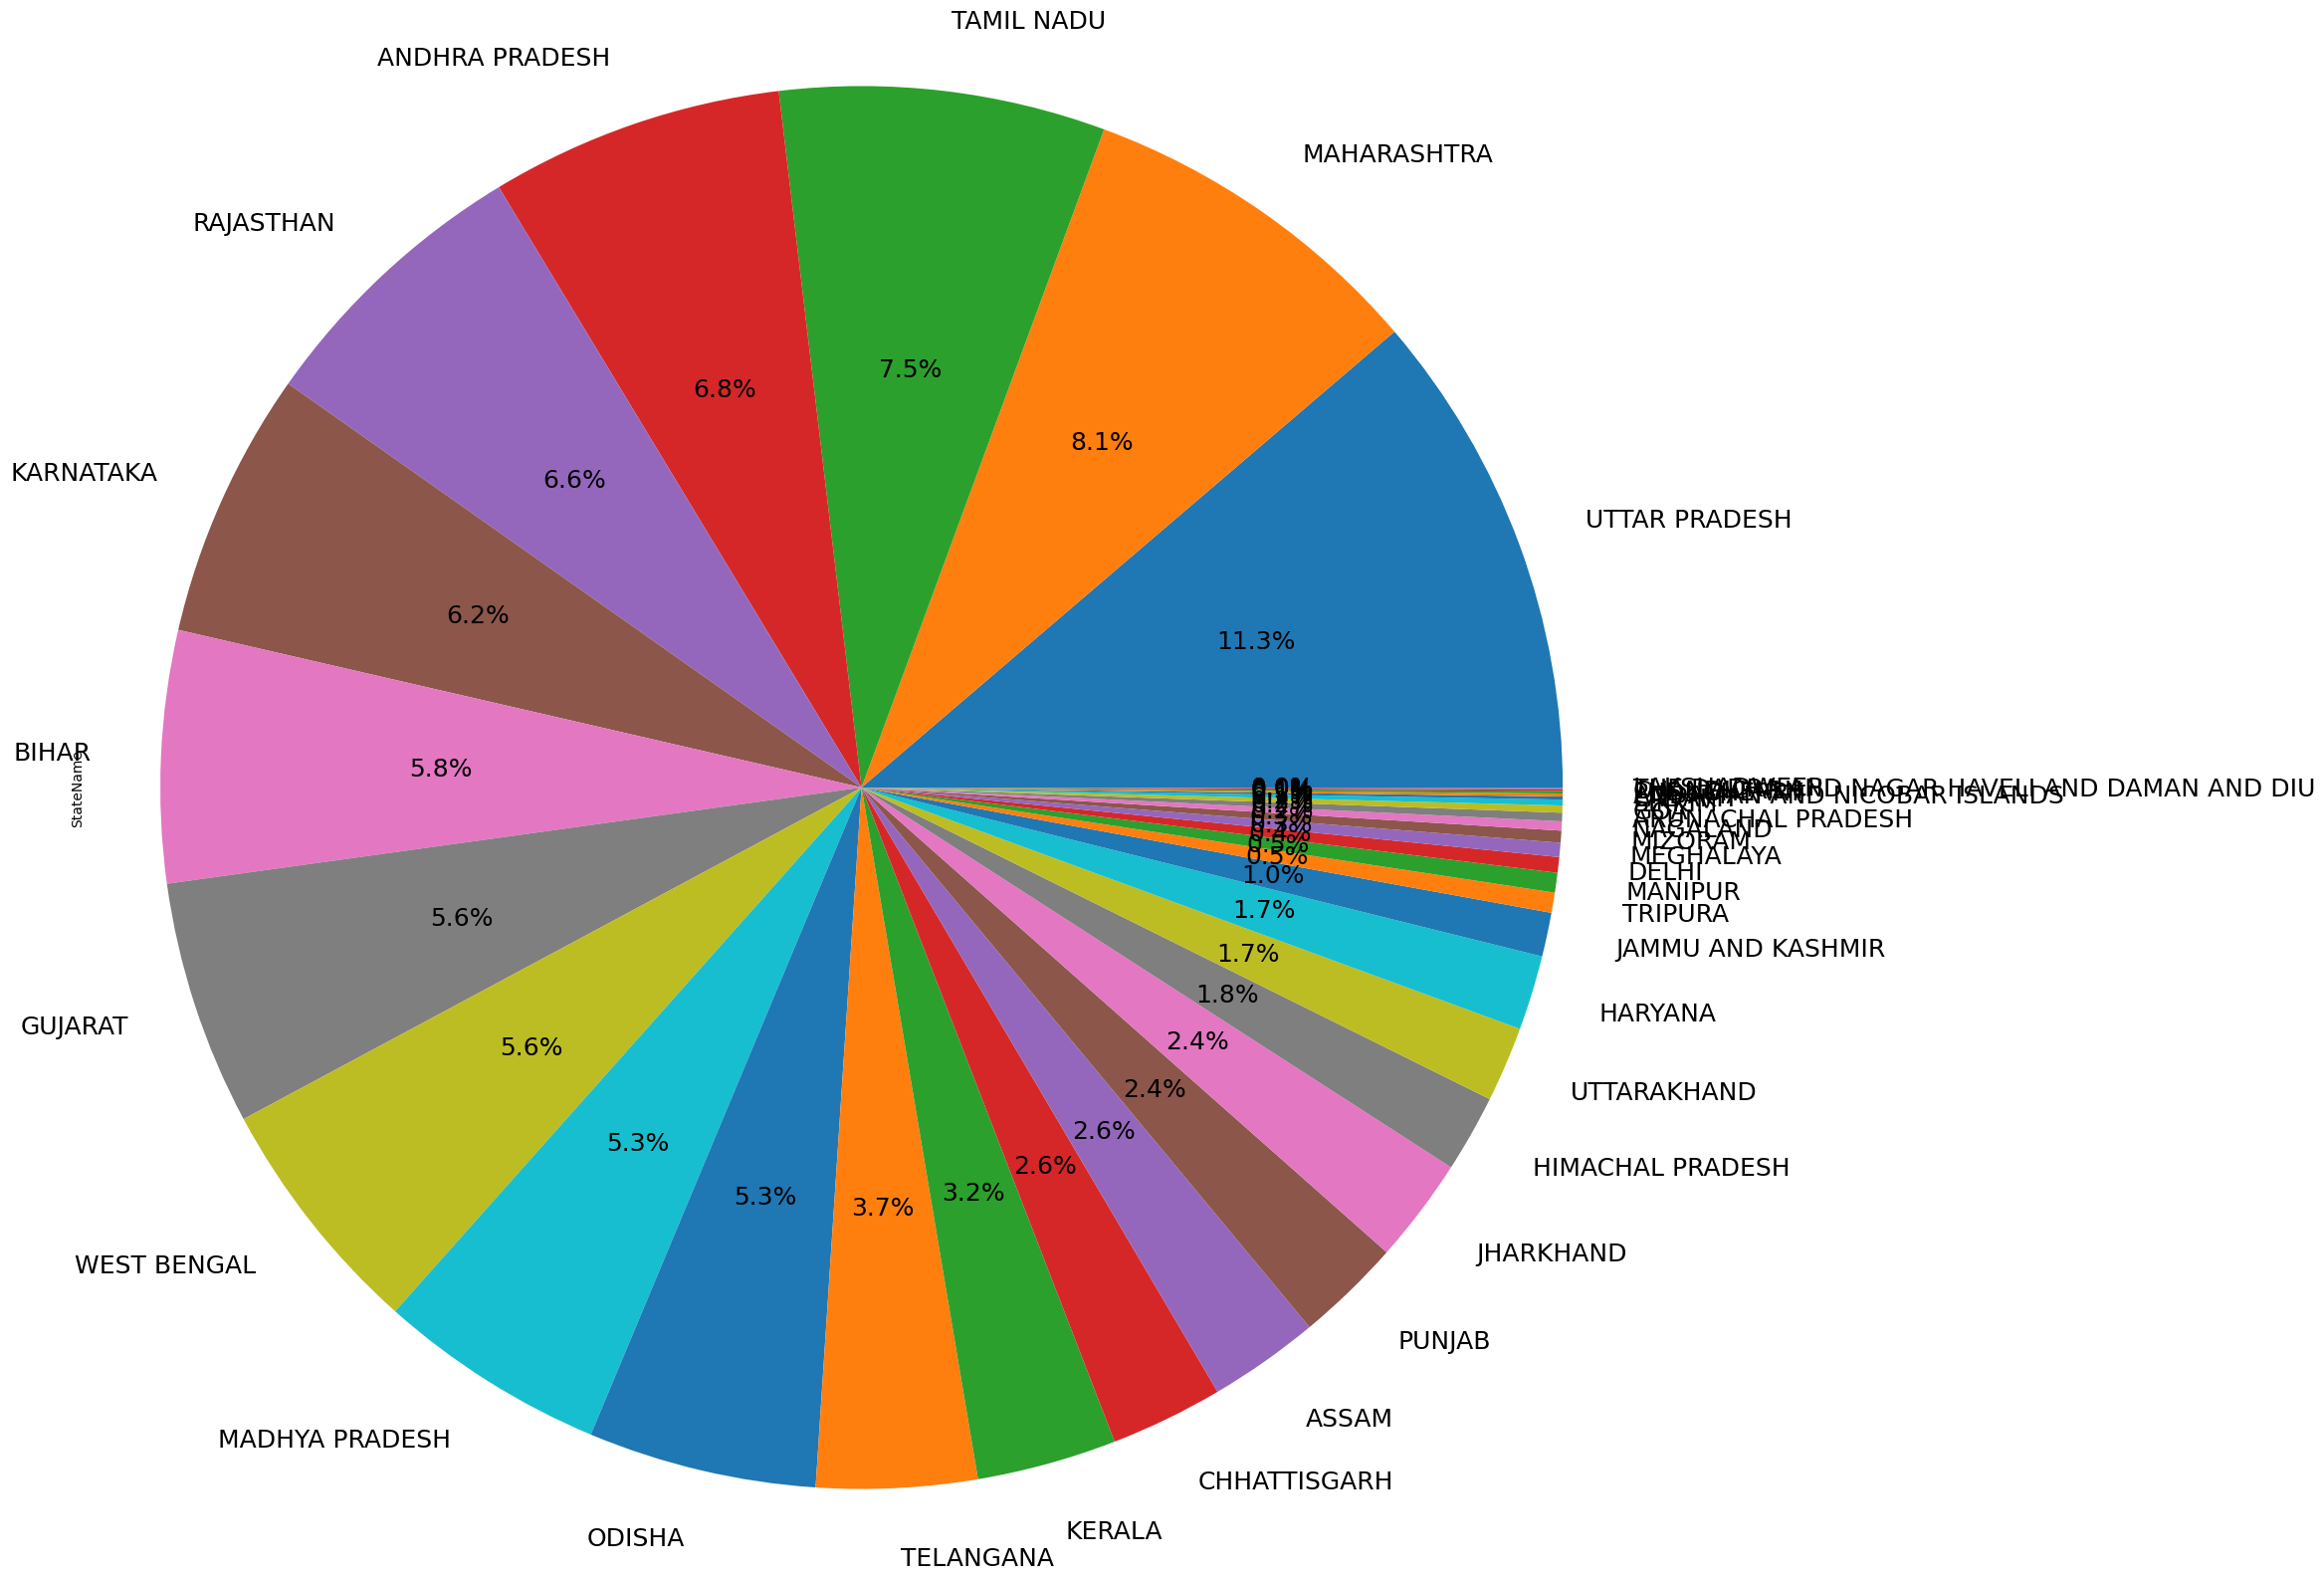

In [12]:
plt.figure(figsize=(20, 20))
df['StateName'].value_counts().plot(kind='pie', autopct='%1.1f%%', textprops={'fontsize': 18})
plt.axis('equal')
plt.show()

### Histogram of Districts

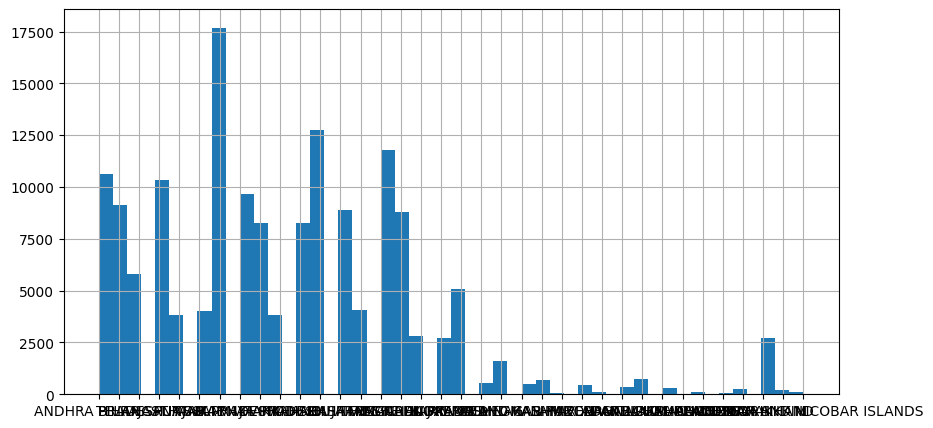

In [13]:
df['StateName'].hist(bins=50, figsize=(10,5))
plt.show()

### Bar Chart of Pincodes per State

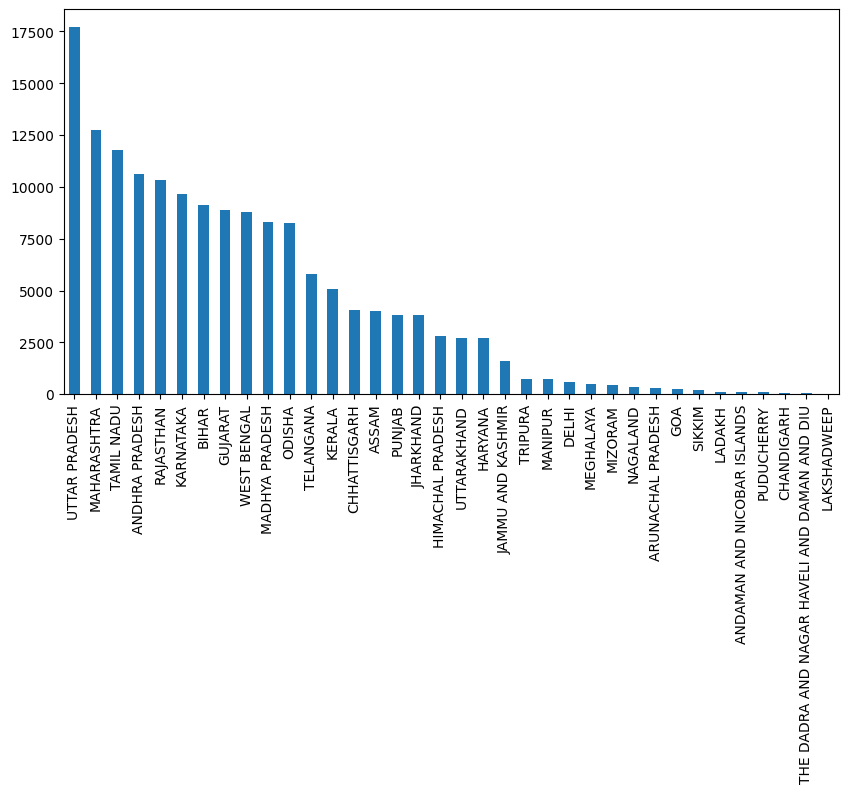

In [14]:
df['StateName'].value_counts().plot(kind='bar', figsize=(10,5))
plt.show()

### Density Plot of Pincodes

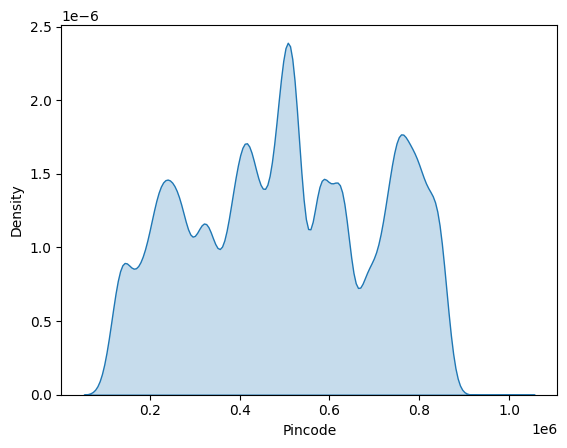

In [15]:
sns.kdeplot(df['Pincode'], shade=True)
plt.show()

### Joint Plot of Pincodes and Districts

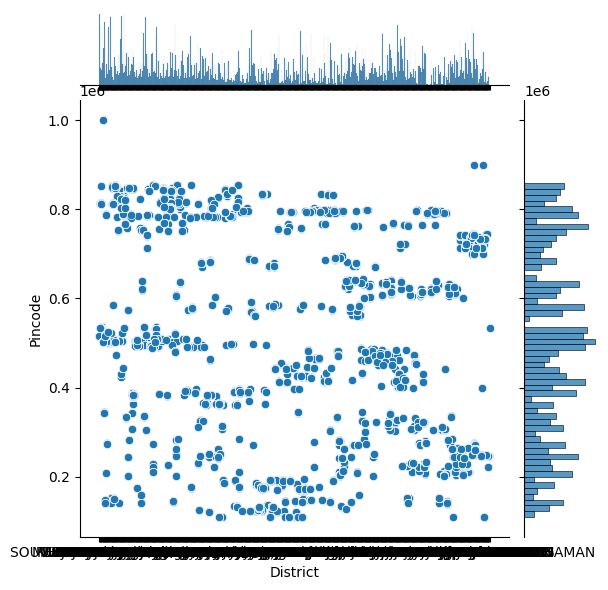

In [16]:
sns.jointplot(x='District', y='Pincode', data=df)
plt.show()

### Pair Plot of all Numeric Columns

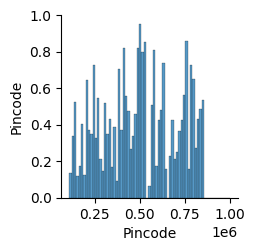

In [17]:
sns.pairplot(df)
plt.show()

### Boxplot of Pincodes per OfficeType

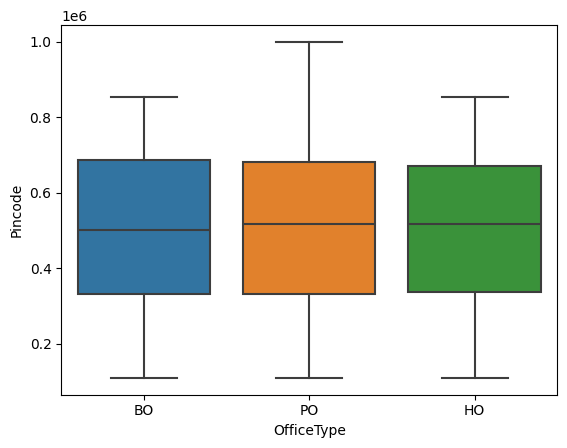

In [18]:
sns.boxplot(x='OfficeType', y='Pincode', data=df)
plt.show()

### Heatmap of Pincodes per CircleName and RegionName

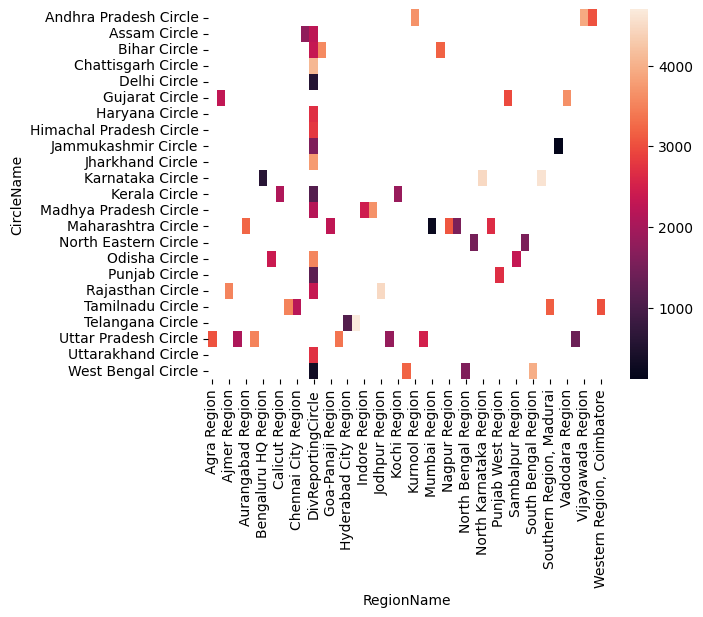

In [19]:
pivot_table = df.pivot_table(index='CircleName', columns='RegionName', values='Pincode', aggfunc='count')
sns.heatmap(pivot_table)
plt.show()

### Word Cloud of OfficeNames

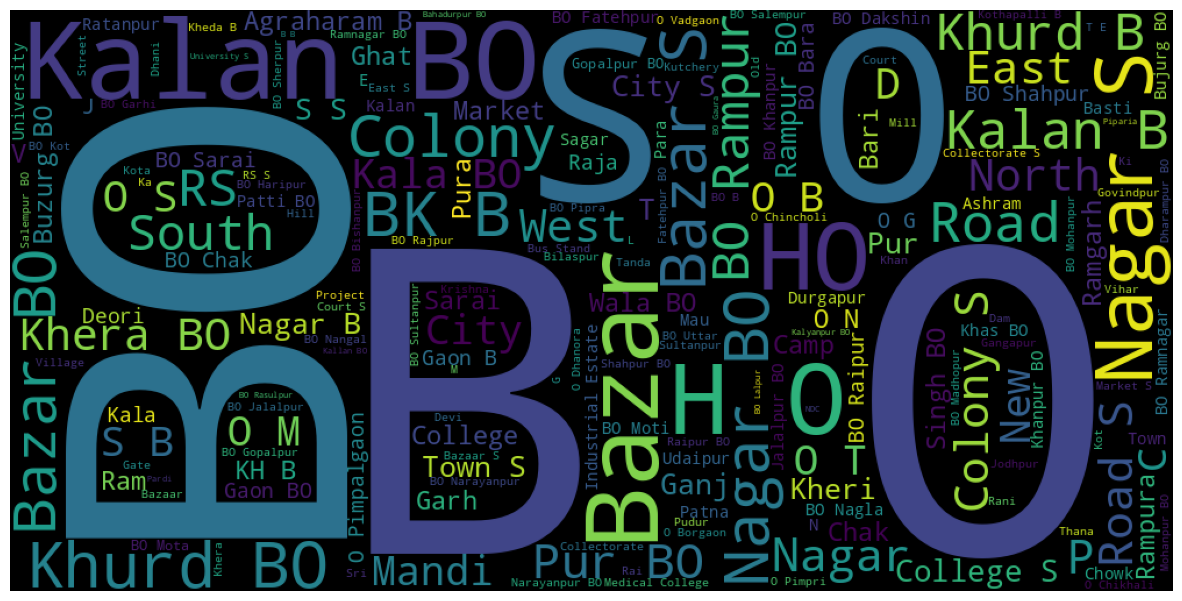

In [20]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(df['OfficeName']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Scatter Plot of Pincodes vs OfficeNames

In [21]:
# sns.scatterplot(x='OfficeName', y='Pincode', data=df)
# plt.show()

### Pie Chart of Pincodes per OfficeType

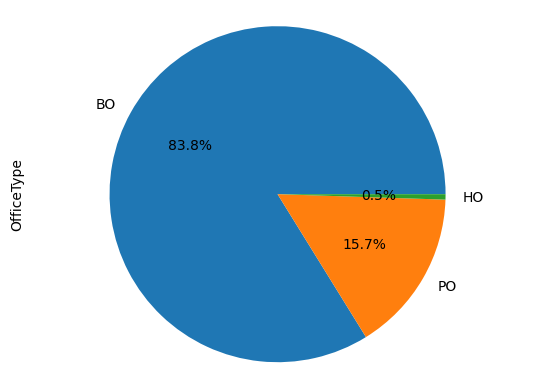

In [22]:
df['OfficeType'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.show()

### Histogram of CircleNames

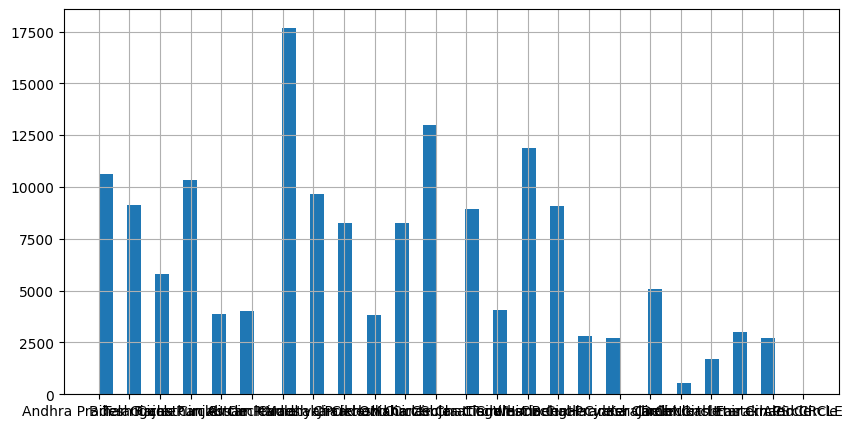

In [23]:
df['CircleName'].hist(bins=50, figsize=(10,5))
plt.show()

### Bar Chart of Pincodes per CircleName

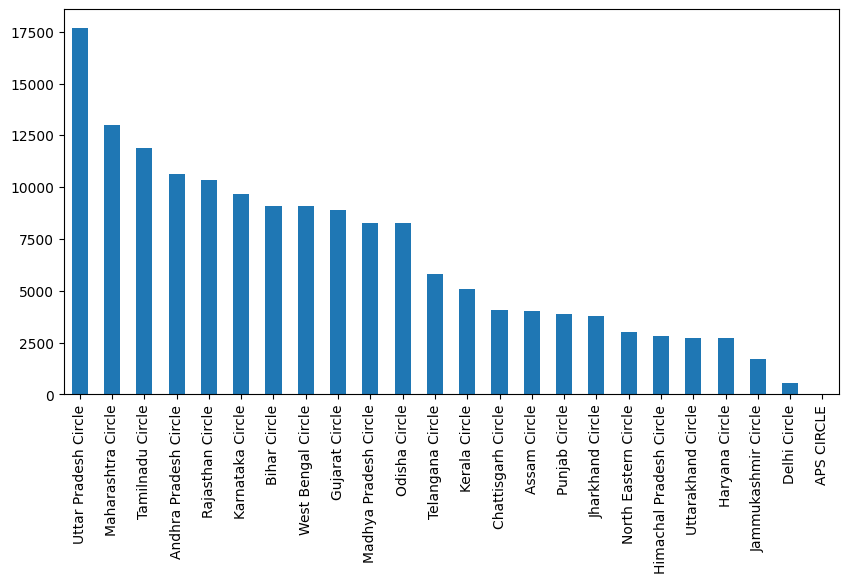

In [24]:
df['CircleName'].value_counts().plot(kind='bar', figsize=(10,5))
plt.show()

### Density Plot of Pincodes per OfficeType

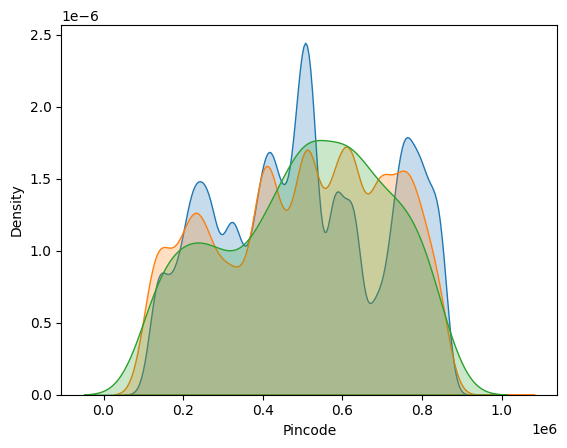

In [25]:
for office_type in df['OfficeType'].unique():
    sns.kdeplot(df[df['OfficeType'] == office_type]['Pincode'], shade=True, label=office_type)
plt.show()

### Violin Plot of Pincodes per Delivery Type

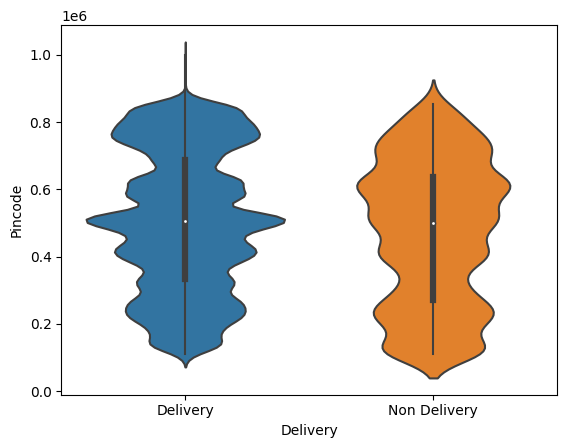

In [26]:
sns.violinplot(x='Delivery', y='Pincode', data=df)
plt.show()

### Count Plot of RegionNames

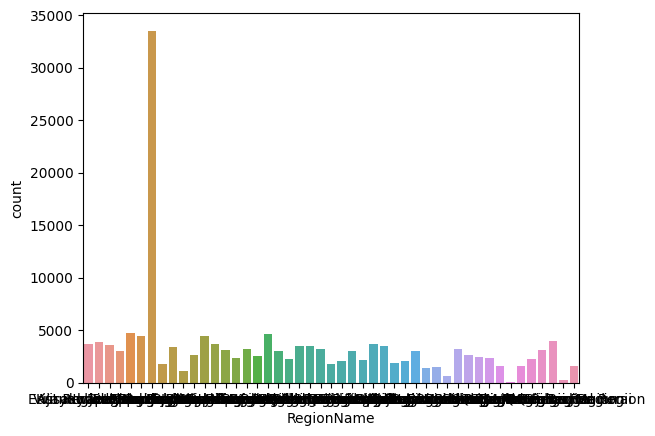

In [27]:
sns.countplot(x='RegionName', data=df)
plt.show()

### Stacked Bar Plot of Pincodes per State and Delivery Type

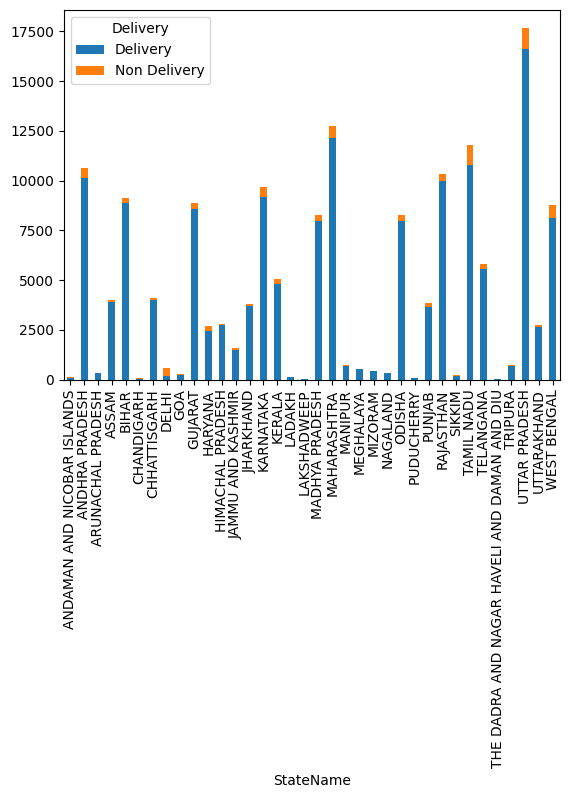

In [28]:
df.groupby(['StateName','Delivery']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

### Area Plot of Pincodes per State

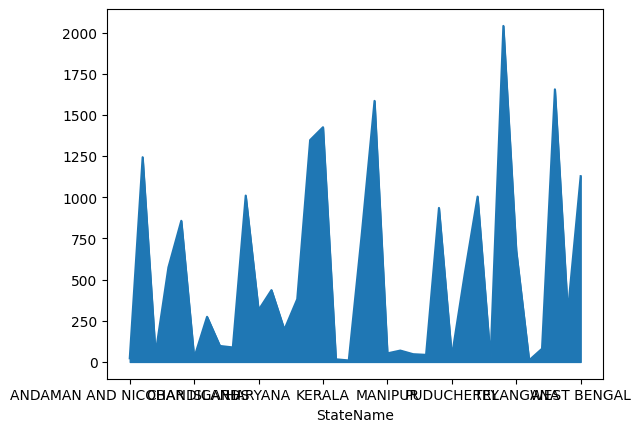

In [29]:
df.groupby('StateName')['Pincode'].nunique().plot(kind='area')
plt.show()

### Pie Chart of Delivery Types

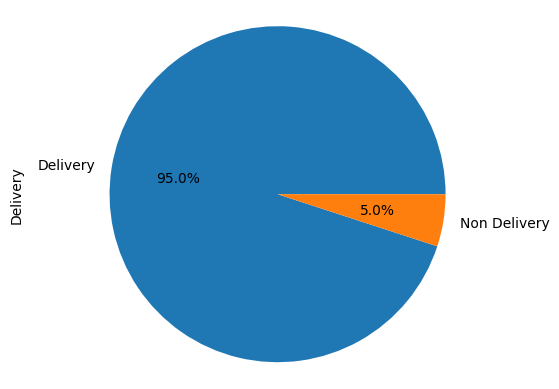

In [30]:
df['Delivery'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.show()

### Pair Plot of Pincodes and OfficeNames

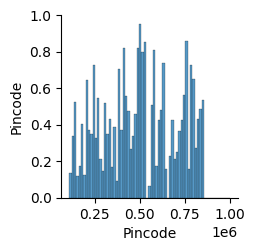

In [31]:
sns.pairplot(df[['Pincode', 'OfficeName']])
plt.show()

### Line Plot of Pincodes per CircleName

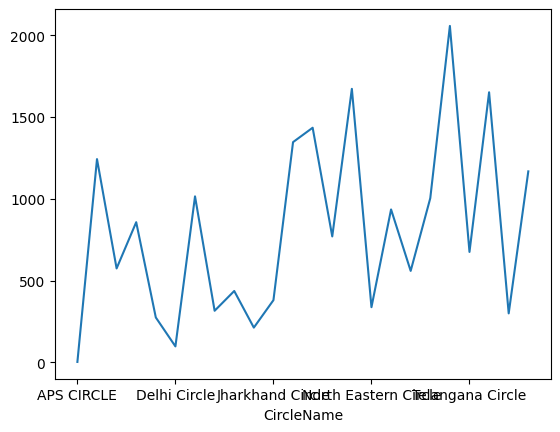

In [32]:
df.groupby('CircleName')['Pincode'].nunique().plot(kind='line')
plt.show()

### Density Plot of Pincodes per CircleName

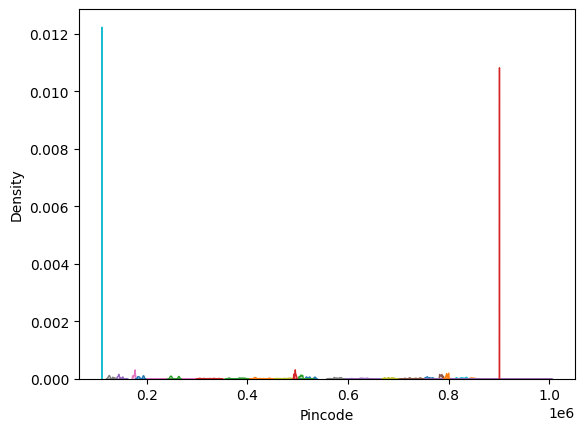

In [33]:
for circle_name in df['CircleName'].unique():
    sns.kdeplot(df[df['CircleName'] == circle_name]['Pincode'], shade=True, label=circle_name)
plt.show()

### Bar Chart of Office Types per State


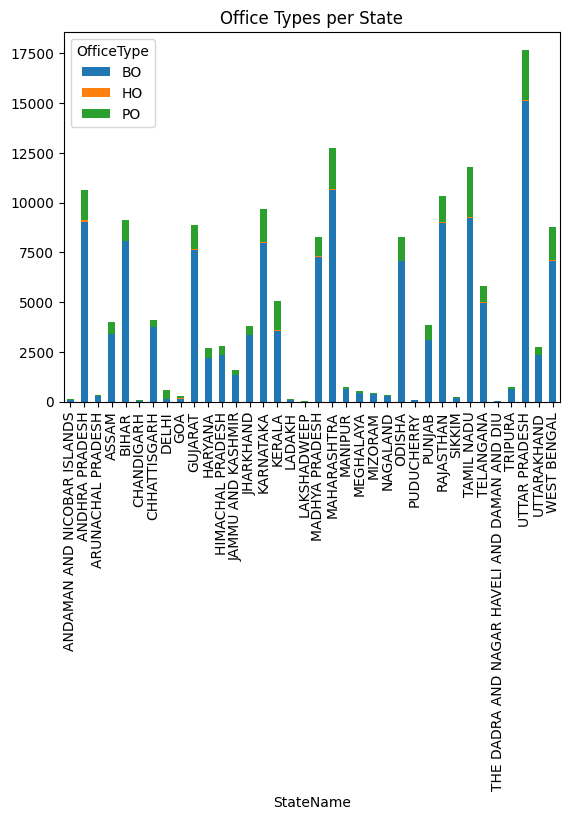

In [34]:
df.groupby(['StateName','OfficeType']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Office Types per State')
plt.show()